# Experiment 2 & 4 - Policy Iteration and Dynamic Programming

Note : If we only print the `optimal policy` then this answers the `Policy Iteration` experiment . 

And if we print both the `optimal policy` and `value function`, this answers the `Dynamic Programming` experiment

In [5]:
import gym
import numpy as np

# create the environment
env = gym.make('FrozenLake-v1',new_step_api=True)

# set the discount factor
gamma = 0.9

# initialize the policy to a uniform distribution over actions for each state
num_states = env.observation_space.n
num_actions = env.action_space.n
policy = np.ones((num_states, num_actions)) / num_actions

# define the policy evaluation function
def policy_evaluation(policy, env, gamma, theta):
    # initialize the value function to zero for all states
    V = np.zeros(num_states)
  
    while True:
        delta = 0
        # for each state, update the value function
        for s in range(num_states):
            v = V[s]
            # calculate the value of each action in the current state
            q = np.zeros(num_actions)  
            for a in range(num_actions):
                for prob, next_state, reward, done in env.P[s][a]:
                    q[a] += prob * (reward + gamma * V[next_state])
            # update the value of the current state
            V[s] = np.dot(policy[s], q)
            # calculate the maximum change in the value function
            delta = max(delta, abs(v - V[s]))
        # check if the maximum change is below the threshold
        if delta < theta:
            break
    return V

# define the policy improvement function
def policy_improvement(policy, env, gamma, V):
    # initialize the policy to be greedy with respect to the current value function
    new_policy = np.zeros((num_states, num_actions))
    for s in range(num_states):
        # calculate the value of each action in the current state
        q = np.zeros(num_actions)
        for a in range(num_actions):
            for prob, next_state, reward, done in env.P[s][a]:
                q[a] += prob * (reward + gamma * V[next_state])
        # update the policy to choose the action with the highest value
        best_action = np.argmax(q)
        new_policy[s][best_action] = 1
    return new_policy

# perform policy iteration
theta = 1e-8  # threshold for convergence
while True:
    # evaluate the current policy
    V = policy_evaluation(policy, env, gamma, theta)
    # improve the policy
    new_policy = policy_improvement(policy, env, gamma, V)
    # check if the policy has converged
    if np.array_equal(policy, new_policy):
        break
    policy = new_policy

# print the final policy
print(policy)
# print the value function
print(V)

(16,)
(16,)
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
[0.06889086 0.06141454 0.07440974 0.0558073  0.0918545  0.
 0.1122082  0.         0.14543633 0.24749694 0.29961758 0.
 0.         0.37993589 0.63902014 0.        ]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Exp 3 - Implement Markov Decision Process


In [19]:
import numpy as np
import gym

num_states = env.observation_space.n
num_actions = env.action_space.n
# policy = np.ones((num_states, num_actions)) / num_actions
def value_iteration(env, theta=0.0001, gamma=0.9):
    # Initialize the value function to zero
    V = np.zeros(num_states)
    
    # Loop until convergence
    while True:
        delta = 0
        
        # For each state s
        for s in range(num_states):
            v = V[s]
            
            # Compute the new value for the state s
            q = np.zeros(num_actions)
            for a in range(num_actions):
                for prob, next_state, reward, done in env.P[s][a]:
                    q[a] += prob * (reward + gamma * V[next_state])
            
            V[s] = np.max(q)
            delta = max(delta, np.abs(v - V[s]))
        
        # Check for convergence
        if delta < theta:
            break
    
    # Compute the optimal policy
    policy = np.zeros((num_states, num_actions))
    for s in range(num_states):
        q = np.zeros(num_actions)
        for a in range(num_actions):
            for prob, next_state, reward, done in env.P[s][a]:
                q[a] += prob * (reward + gamma * V[next_state])
        best_action = np.argmax(q)
        policy[s, best_action] = 1
    
    return V, policy

env = gym.make('FrozenLake-v1', new_step_api = True)
V, policy = value_iteration(env)
print(V)
print(policy)

[0.06848032 0.06111567 0.07422254 0.05560469 0.09153995 0.
 0.11212558 0.         0.14522151 0.24737863 0.29954442 0.
 0.         0.37986011 0.63898452 0.        ]
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
V.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(16,)

# Exp 5 - Q - Learning Algorithm

In [8]:
import gym
import numpy as np

# Create the FrozenLake environment
env = gym.make('FrozenLake-v1')

# Define the Q-value function as a matrix with size (num_states, num_actions)
num_states = env.observation_space.n
num_actions = env.action_space.n
Q = np.zeros((num_states, num_actions))


# Define the parameters of the Q-learning algorithm
alpha = 0.8  # learning rate
gamma = 0.7  # discount factor
epsilon = 0.2  # exploration probability

explo = 0
explt = 0

# Define a function to select an action based on the Q-value function and exploration-exploitation strategy
def select_action(state):
    if np.random.rand() < epsilon:
        global explo
        explo += 1
        return env.action_space.sample()  # explore - a random action is chosen
    else:
        global explt
        explt += 1
        return np.argmax(Q[state])  # exploit - action with the highest Q-value in the current state is chosen

# Define the main loop of the Q-learning algorithm
num_episodes = 10000
for episode in range(num_episodes):
    state = env.reset()
    done = False
    while not done:
        action = select_action(state)
        next_state, reward, done, info = env.step(action)
        Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])  # update the Q-value function
        state = next_state

# Print the learned Q-value function and optimal policy
print(f"Exploration: {explo}")
print(f"Exploitation: {explt}")
print("Q-value function:")
print(Q)
optimal_policy = np.argmax(Q, axis=1)
print("\nOptimal policy:")
print(optimal_policy.reshape((4,4)))


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Exploration: 23635
Exploitation: 94305
Q-value function:
[[1.88624562e-04 8.05946586e-05 9.15627970e-05 2.00052179e-04]
 [5.99210641e-05 2.69268163e-04 3.29664504e-04 1.54942093e-04]
 [2.73714751e-04 3.00336048e-04 8.77229575e-03 2.94591088e-04]
 [6.07419982e-06 3.80499444e-04 9.42439263e-05 8.21875857e-04]
 [1.61126843e-04 2.59795286e-04 4.44321761e-04 1.95897742e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.10004235e-03 1.65295222e-04 7.97674621e-05 3.21918023e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.88305201e-04 8.21775624e-06 2.31510271e-05 4.38130409e-04]
 [1.70749419e-02 9.70738590e-02 1.03774512e-02 1.39686736e-02]
 [3.09662458e-03 4.91901259e-02 6.97762023e-02 2.50989390e-05]
 [0.00000

# 6 - Bellman Equation

In [ ]:
import gym
import numpy as np

# Create the FrozenLake environment
env = gym.make('FrozenLake-v1')

# Define the value function as a vector with size (num_states)
num_states = env.observation_space.n
V = np.zeros(num_states)
print("Initial Value Function")
print(V.reshape(4, 4))
print()

# Define the parameters of the value iteration algorithm
gamma = 0.99  # discount factor
epsilon = 1e-8  # convergence threshold
num_iterations = 100000  # maximum number of iterations

# Define a function to update the value of a state based on the Bellman equation
def bellman_update(V, state, gamma):
    action_values = np.zeros(env.action_space.n)
    for action in range(env.action_space.n):
        for prob, next_state, reward, done in env.P[state][action]:
            action_values[action] += prob * (reward + gamma * V[next_state])
    return np.max(action_values)

# Run the value iteration algorithm
for i in range(num_iterations):
    delta = 0
    for state in range(num_states):
        v = V[state]
        V[state] = bellman_update(V, state, gamma)
        delta = max(delta, abs(v - V[state]))
    if delta < epsilon:
        break

# Print the learned value function and optimal policy
print("Value function:")
print(V.reshape(4, 4))
optimal_policy = np.zeros(num_states, dtype=np.int)
for state in range(num_states):
    action_values = np.zeros(env.action_space.n)
    for action in range(env.action_space.n):
        for prob, next_state, reward, done in env.P[state][action]:
            action_values[action] += prob * (reward + gamma * V[next_state])
    optimal_policy[state] = np.argmax(action_values)
print("\nOptimal policy:")
print(optimal_policy.reshape((4, 4)))

# Monte Carlo

In [16]:
import gym
import numpy as np

# Create the FrozenLake environment
env = gym.make('FrozenLake-v1')

# Define the parameters of the Monte Carlo Control algorithm
num_episodes = 10000
gamma = 0.9  # discount factor

# Define the Q-value function as a matrix with size (num_states, num_actions)
num_states = env.observation_space.n
num_actions = env.action_space.n
Q = np.zeros((num_states, num_actions))

# Define a dictionary to store the returns for each state-action pair
returns = {}

# Define a function to select an action based on the Q-value function and exploration-exploitation strategy
def select_action(state, epsilon):
    if np.random.rand() < epsilon:
        return env.action_space.sample()  # explore
    else:
        return np.argmax(Q[state])  # exploit

# Define the main loop of the Monte Carlo Control algorithm
for episode in range(num_episodes):
    # Initialize episode variables
    state = env.reset()
    done = False
    episode_history = []

    # Generate an episode by following the current policy
    while not done:
        action = select_action(state, epsilon=1/(episode+1))  # decaying epsilon-greedy exploration
        next_state, reward, done, _ = env.step(action)
        episode_history.append((state, action, reward))
        state = next_state

    # Update the Q-value function using the episode history
    G = 0  # total discounted reward
    for t in reversed(range(len(episode_history))):
        state, action, reward = episode_history[t]
        G = gamma * G + reward
        state_action = (state, action)
        if state_action not in [(x[0], x[1]) for x in episode_history[0:t]]:
            if state_action not in returns:
                returns[state_action] = [G]
            else:
                returns[state_action].append(G)
            Q[state][action] = np.mean(returns[state_action])

# Print the learned Q-value function and optimal policy
print("Q-value function:")
print(Q)
optimal_policy = np.argmax(Q, axis=1)
print("\nOptimal policy:")
print(optimal_policy.reshape((4,4)))


Q-value function:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Optimal policy:
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


# Ignore

In [2]:
1e-8

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1e-08

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


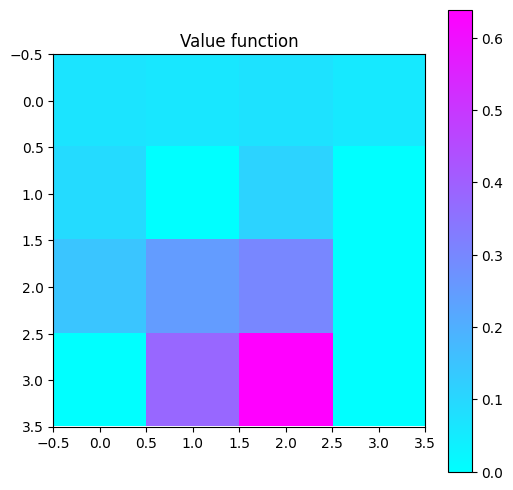

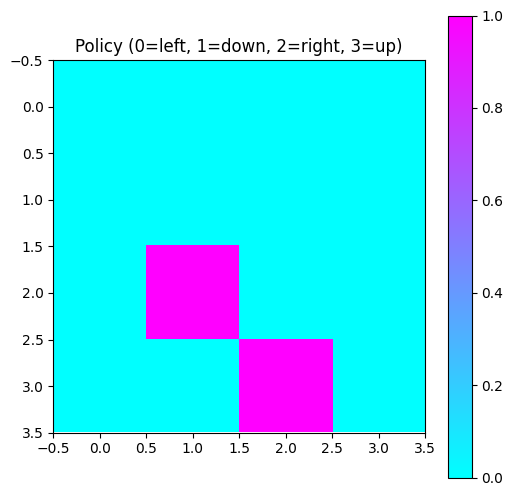

In [3]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# create the environment
env = gym.make('FrozenLake-v1')

# set the discount factor
gamma = 0.9

# initialize the value function to zero
V = np.zeros(env.observation_space.n)

# run the value iteration algorithm until convergence
while True:
    delta = 0
    for s in range(env.observation_space.n):
        v = V[s]
        # compute the value of each action using the Bellman equation
        action_values = np.zeros(env.action_space.n)
        for a in range(env.action_space.n):
            for prob, next_state, reward, done in env.P[s][a]:
                action_values[a] += prob * (reward + gamma * V[next_state])
        # update the value function using the maximum action value
        V[s] = np.max(action_values)
        delta = max(delta, np.abs(v - V[s]))
    if delta < 1e-6:
        break

# compute the optimal policy
policy = np.zeros((env.observation_space.n, env.action_space.n))
for s in range(env.observation_space.n):
    action_values = np.zeros(env.action_space.n)
    for a in range(env.action_space.n):
        for prob, next_state, reward, done in env.P[s][a]:
            action_values[a] += prob * (reward + gamma * V[next_state])
    # select the action with the highest expected value
    best_action = np.argmax(action_values)
    policy[s, best_action] = 1

# visualize the value function
plt.figure(figsize=(6, 6))
plt.imshow(V.reshape(4, 4), cmap='cool', interpolation='none')
plt.colorbar()
plt.title('Value function')
plt.show()

# visualize the policy
plt.figure(figsize=(6, 6))
plt.imshow(policy[:, 1].reshape(4, 4), cmap='cool', interpolation='none')
plt.colorbar()
plt.title('Policy (0=left, 1=down, 2=right, 3=up)')
plt.show()


In [6]:
print(policy)

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
import gym
import numpy as np
import time
from pyvirtualdisplay import Display

# create a virtual display to render the environment
display = Display(visible=0, size=(1400, 900), xvfb_path='/usr/bin/Xvfb')
display.start()
# create the environment
env = gym.make('FrozenLake-v1')

# set the discount factor
gamma = 0.9

# initialize the policy to a uniform distribution over actions for each state
num_states = env.observation_space.n
num_actions = env.action_space.n
policy = np.ones((num_states, num_actions)) / num_actions

# run policy iteration until convergence
while True:
    # evaluate the current policy by computing the value function
    V = np.zeros(num_states)
    for i in range(1000):
        for s in range(num_states):
            action = np.random.choice(num_actions, p=policy[s])
            observation, reward, done, info = env.step(action)
            V[s] += reward + gamma * V[observation]
            if done:
                env.reset()

    # improve the policy using the value function
    new_policy = np.zeros((num_states, num_actions))
    for s in range(num_states):
        action_values = np.zeros(num_actions)
        for a in range(num_actions):
            for prob, next_state, reward, done in env.P[s][a]:
                action_values[a] += prob * (reward + gamma * V[next_state])
        best_action = np.argmax(action_values)
        new_policy[s, best_action] = 1
    if np.all(policy == new_policy):
        break
    policy = new_policy

# run the policy in the environment
env.reset()
for t in range(100):
    time.sleep(0.5)  # wait half a second before rendering the environment
    action = np.argmax(policy[env.env.s])
    observation, reward, done, info = env.step(action)
    env.render()
    if done:
        break
env.close()

# stop the virtual display
display.stop()


TypeError: ignored

In [10]:
!pip install pyvirtualdisplay

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
!sudo apt-get install xvfb

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 24 not upgraded.
Need to get 7,697 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libfontenc1 amd64 1:1.1.4-0ubuntu1 [14.0 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libxfont2 amd64 1:2.0.3-1 [91.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/main amd64 libxkbfile1 amd64 1:1.1.0-1 [65.3 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/main amd64 x11-xkb-utils amd64 7.7+5 [158 kB]
Get:5 http://archive.ubuntu.com/ubunt